In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

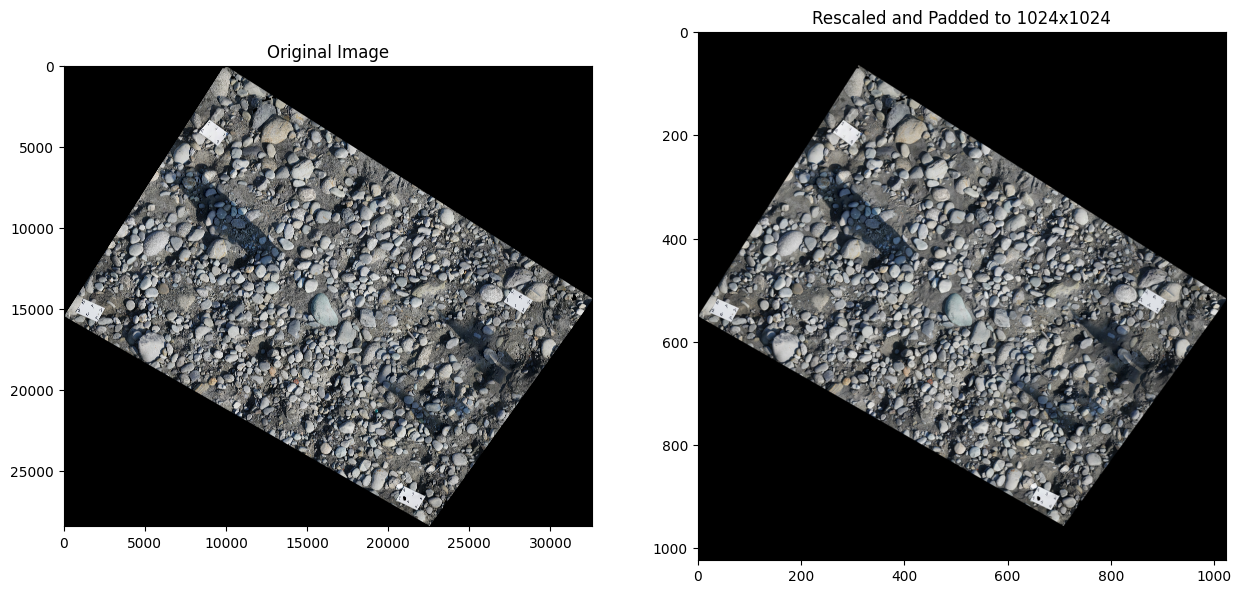

In [20]:
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from tifffile import imread

# Open the image (assuming it's a tiff file)
image = imread('/DATA/vito/data/Ravi/Ravi3_orthomosaic_clip_02mm.tif')[:, :, :-1]  # Remove alpha channel if present

# Convert NumPy array to PIL Image
image_pil = Image.fromarray(image)

# Show the original image
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(image_pil)
plt.title('Original Image')

# Calculate the padding to maintain aspect ratio
desired_size = 1024
old_size = image_pil.size  # old_size is in (width, height) format

# Calculate the new size maintaining the aspect ratio
ratio = float(desired_size) / max(old_size)
new_size = tuple([int(x * ratio) for x in old_size])

# Resize the image using PIL with LANCZOS (formerly known as ANTIALIAS)
image_resized = image_pil.resize(new_size, Image.Resampling.LANCZOS)

# Create a new image with the desired size and a black background
new_image = Image.new("RGB", (desired_size, desired_size), (0, 0, 0))

# Paste the resized image onto the center of the black background
new_image.paste(image_resized, ((desired_size - new_size[0]) // 2, (desired_size - new_size[1]) // 2))

# Show the resized and padded image
plt.subplot(1, 2, 2)
plt.imshow(new_image)
plt.title('Rescaled and Padded to 1024x1024')
plt.show()



In [21]:
image.shape

(28382, 32563, 3)

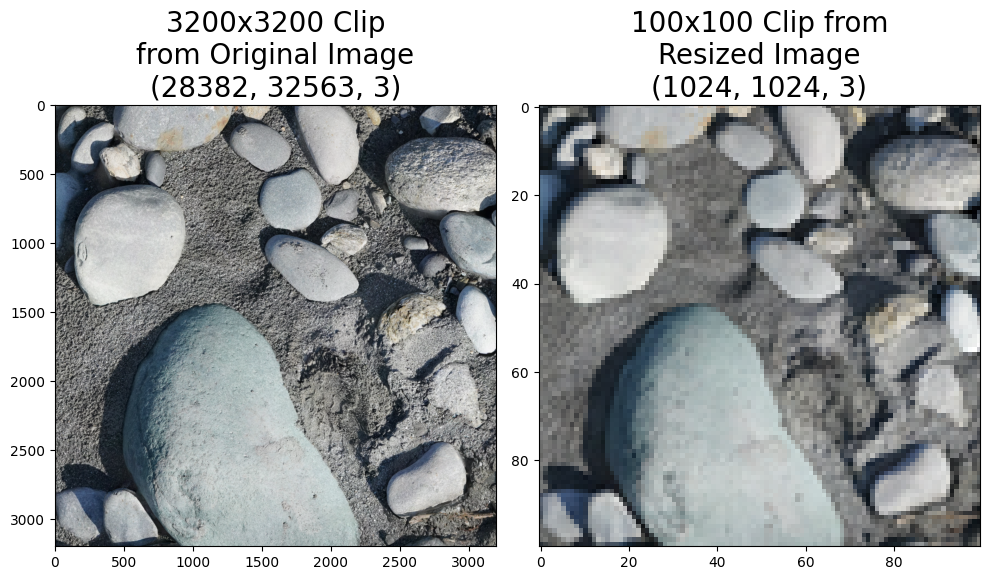

In [36]:
center_x, center_y = old_size[0] // 2, old_size[1] // 2

# Index for 100x100 area in the center
original_clip = image_pil.crop((center_x - 1600, center_y - 1600, center_x + 1600, center_y + 1600))

# Resized image center coordinates (1024, 1024)
new_center_x, new_center_y = new_image.size[0] // 2, new_image.size[1] // 2

# Index for 100x100 area in the center of the resized image
resized_clip = new_image.crop((new_center_x - 50, new_center_y - 50, new_center_x + 50, new_center_y + 50))

# Plot the clips
plt.figure(figsize=(10,8))
plt.subplot(1, 2, 1)
plt.imshow(original_clip)
plt.title('3200x3200 Clip\nfrom Original Image\n(28382, 32563, 3)',fontsize=20)

plt.subplot(1, 2, 2)
plt.imshow(resized_clip)
plt.title('100x100 Clip from\nResized Image\n(1024, 1024, 3)',fontsize=20)
plt.tight_layout()
plt.show()

ValueError: resize only works on single-segment arrays

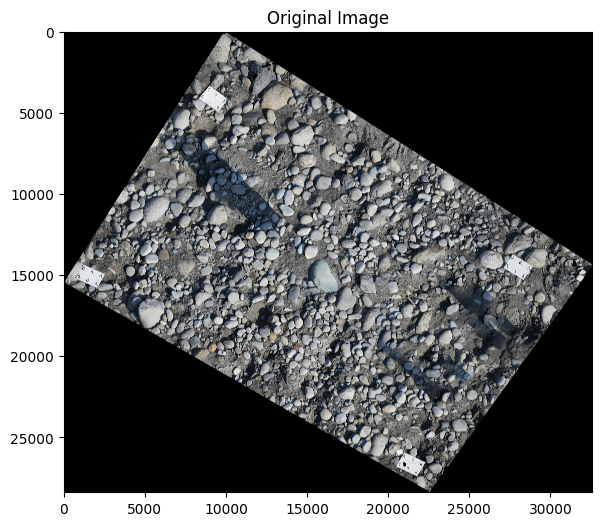

In [16]:
from PIL import Image, ImageOps
from tifffile import imread
# Open the image
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
image = imread('/DATA/vito/data/Ravi/Ravi3_orthomosaic_clip_02mm.tif')[:,:,:-1]
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)  
plt.title('Original Image')

# Calculate the padding to maintain aspect ratio
desired_size = 1024
old_size = (image).shape[:-1]  # old_size[0] is in (width, height) format

ratio = float(desired_size) / max(old_size)
new_size = tuple([int(x * ratio) for x in old_size])
image = image.resize(new_size)

new_image = Image.new("RGB", (desired_size, desired_size))
new_image.paste(image, ((desired_size - new_size[0]) // 2, (desired_size - new_size[1]) // 2))

plt.subplot(1,2,2)
plt.title('Rescaled and padded to 1024x1024')
plt.imshow(new_image)

Text(0.5, 1.0, 'Memory demand for 1024x1024 image')

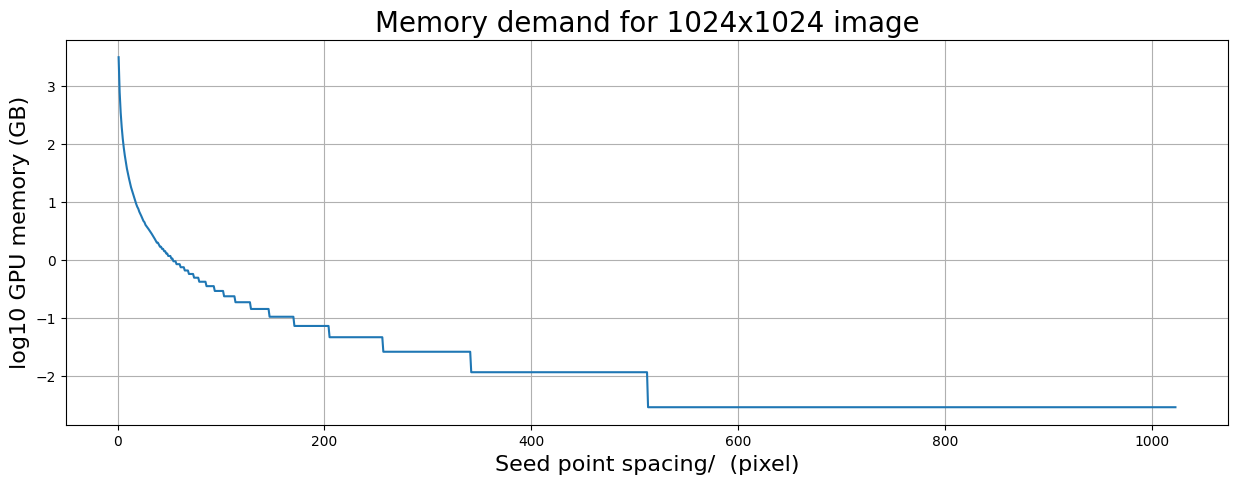

In [ ]:
#memory usage
crop_size=1024
memory_required=[]
plt.figure(figsize=(15,5))
for i in range(1,crop_size):
    minor_axis_length_of_interest=i   
    memory_per_point=crop_size*crop_size*3
    num_point_required=crop_size//minor_axis_length_of_interest
    memory_required.append(((num_point_required**2)*memory_per_point)/1024**3)#bytes to gb
plt.plot(np.arange(1,crop_size),np.log10(memory_required))
plt.grid()
plt.xlabel('Seed point spacing/  (pixel)',fontsize=16)
plt.ylabel('log10 GPU memory (GB)',fontsize=16)
plt.title('Memory demand for 1024x1024 image',fontsize=20)

In [ ]:
#memory usage vs nnumber of seed point perside for 1024
crop_size=1024
memory_required=[]
plt.figure(figsize=(15,5))
for i in range(1,200):
    memory_per_point=crop_size*crop_size*3
    num_points=i**2
    memory_required.append((num_points*memory_per_point)/1024**3)#bytes to gb
plt.plot(np.arange(1,200),memory_required)
#plt.yscale('log')
plt.grid()
plt.xlabel('Number of seed points per side',fontsize=16)
#plt.ylim(0,120)
#plt.ylim(0,200)

plt.ylabel('GPU memory (GB)',fontsize=16)
plt.title('Memory demand for 1024x1024 image',fontsize=20)
#top x axis diagonal distance between seed points
ax1 = plt.gca()
ax2 = ax1.secondary_xaxis('top', functions=(lambda x: np.sqrt(2) * (1024 / x), lambda x: 1024 * np.sqrt(2) / x))
ax2.set_xlabel('Diagonal distance between seed points (pixel)',fontsize=12)

tick_locations = [1000,200,100,50,25,10]
ax2.set_xticks(tick_locations)
#ax2.set_xticklabels(tick_labels)

Text(0.5, 1.0, 'Memory demand')

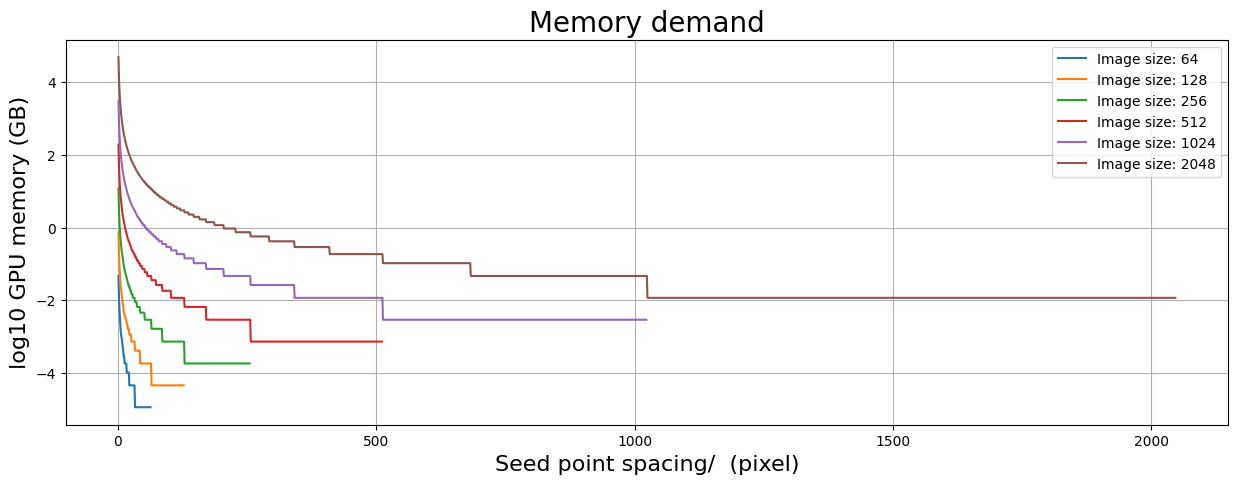

In [ ]:
#memory usage
plt.figure(figsize=(15,5))
for crop_size in [64,128,256,512,1024,2048]:
    memory_required=[]
    for i in range(1,crop_size):
        minor_axis_length_of_interest=i   
        memory_per_point=crop_size*crop_size*3
        num_point_required=crop_size//minor_axis_length_of_interest
        memory_required.append(((num_point_required**2)*memory_per_point)/1024**3)#bytes to gb
    plt.plot(np.arange(1,crop_size),np.log10(memory_required), label=f'Image size: {crop_size}')

plt.legend()
plt.grid()
plt.xlabel('Seed point spacing/  (pixel)',fontsize=16)
plt.ylabel('log10 GPU memory (GB)',fontsize=16)
plt.title('Memory demand',fontsize=20)

Text(0.5, 1.0, 'Memory demand')

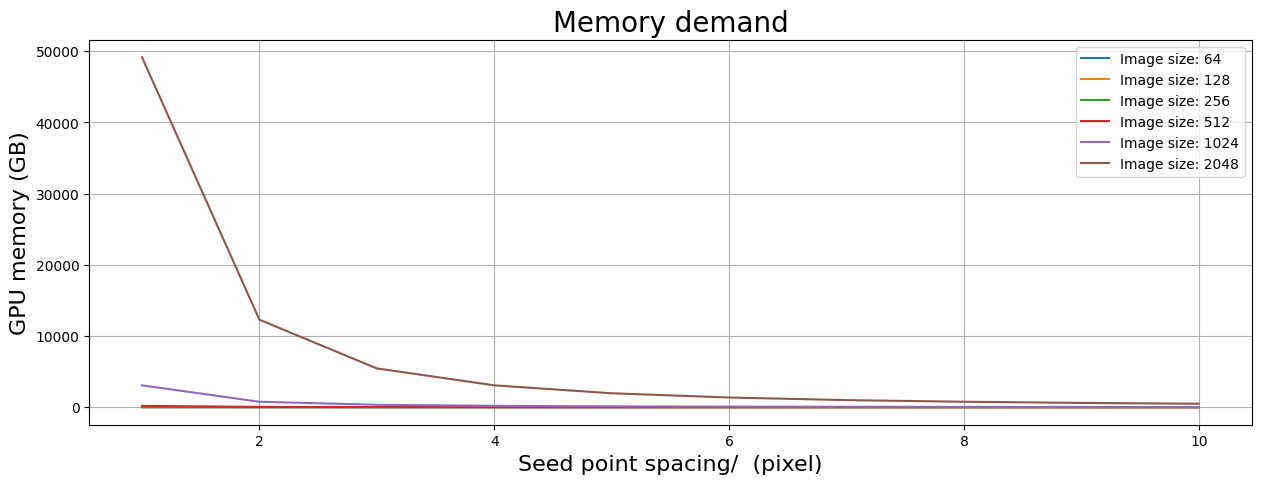

In [ ]:
#memory usage
plt.figure(figsize=(15,5))
for crop_size in [64,128,256,512,1024,2048]:
    memory_required=[]
    for i in range(1,crop_size):
        minor_axis_length_of_interest=i   
        memory_per_point=crop_size*crop_size*3
        num_point_required=crop_size//minor_axis_length_of_interest
        memory_required.append(((num_point_required**2)*memory_per_point)/1024**3)#bytes to gb
    plt.plot(np.arange(1,crop_size)[:10],(memory_required)[:10], label=f'Image size: {crop_size}')

plt.legend()
plt.grid()
plt.xlabel('Seed point spacing/  (pixel)',fontsize=16)
plt.ylabel('GPU memory (GB)',fontsize=16)
plt.title('Memory demand',fontsize=20)

Text(0.5, 1.0, 'Memory demand')

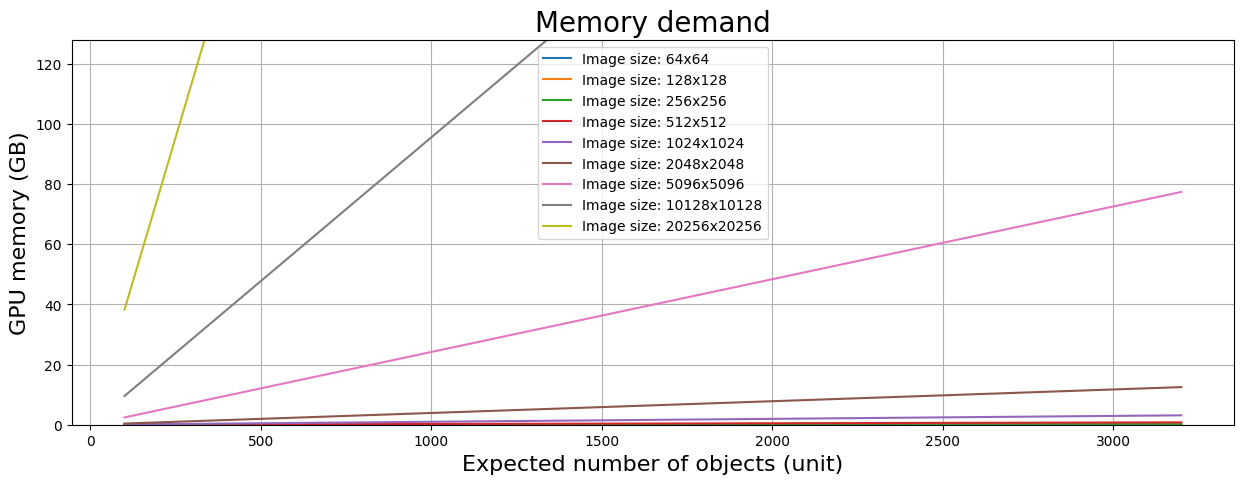

In [7]:
#memory usage
num_objects=[100,200,400,800,1600,3200]
plt.figure(figsize=(15,5))
for img_size in [64,128,256,512,1024,2048,5096,10128,20256]:
    memory_required=[]
    for i in num_objects:
        memory_per_obj=img_size*img_size
        num_msk_required=i
        memory_required.append(((num_msk_required)*memory_per_obj)/1024**3)#bytes to gb
    plt.plot(num_objects,(memory_required), label=f'Image size: {img_size}x{img_size}')

plt.legend()
plt.grid()
plt.xlabel('Expected number of objects (unit)',fontsize=16)
plt.ylabel('GPU memory (GB)',fontsize=16)
plt.ylim(0,128)
plt.title('Memory demand',fontsize=20)

Text(0.5, 1.0, 'Memory demand')

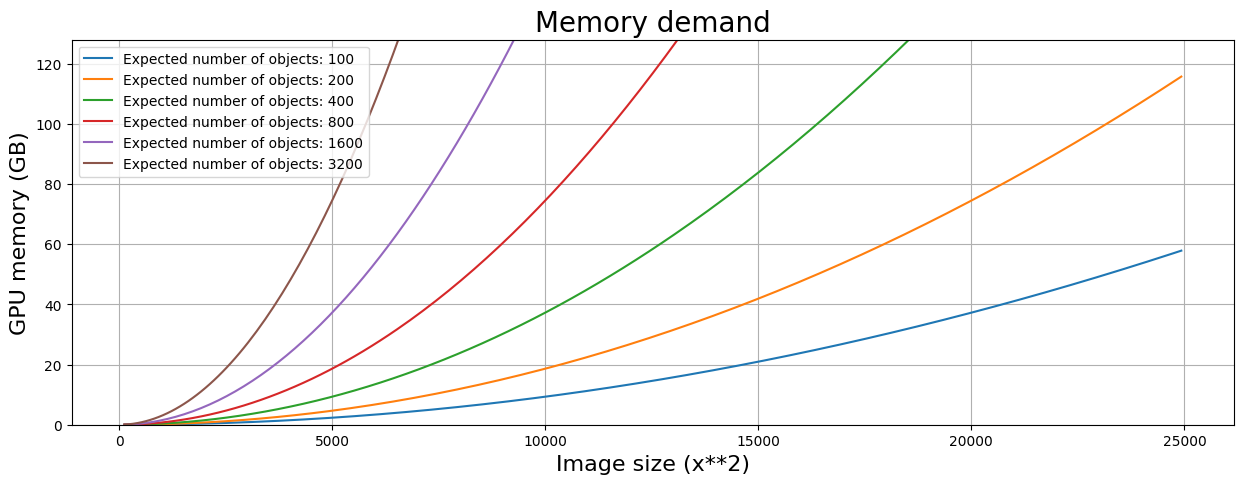

In [11]:
#memory usage
num_objects=[100,200,400,800,1600,3200]
plt.figure(figsize=(15,5))
for i in num_objects:
    memory_required=[]
    for img_size in range(128,25000,100):
        memory_per_obj=img_size*img_size
        num_msk_required=i
        memory_required.append(((num_msk_required)*memory_per_obj)/1024**3)#bytes to gb
    plt.plot(range(128,25000,100),(memory_required), label=f'Expected number of objects: {i}')

plt.legend()
plt.grid()
plt.xlabel('Image size (x**2)',fontsize=16)
plt.ylabel('GPU memory (GB)',fontsize=16)
plt.ylim(0,128)
plt.title('Memory demand',fontsize=20)

In [ ]:
OutDIR='/DATA/vito/output/Ravi3_run_dw4/'
all_reseg=np.load(OutDIR+'all_reseg_mask.npy', allow_pickle=True)

In [ ]:
print("The size of array arr is:",all_reseg.size)
print("The memorysize of each element of arr is:", all_reseg.itemsize,"bytes")
print("The memory size of numpy array arr is:",all_reseg.itemsize*all_reseg.size,"bytes")

In [ ]:
arr=np.ones((2000,2000,195),dtype=np.uint8)
print("The given array is:",arr.shape)
print("The size of array arr is:",arr.size)
print("The memorysize of each element of arr is:", arr.itemsize,"bytes")
print("The memory size of numpy array arr is:",arr.itemsize*arr.size,"bytes")